### This notebook downloads macroeconomic variables from worldbank data.
#### There are 89 datasets available from which we will mainly just use WDI.

In [61]:
# !pip install wbgapi
import wbgapi as wb
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [ ]:
wb.source.info() #list of datasets available

There are 1442 different series to choose from. ```wb.series.info()``` shows a comprehensive list of all of them. 


In [4]:
#wb.series.info() 

The variables chosen are GDP (constant 2015 US$)(NY.GDP.MKTP.KD), GNI (constant 2015 US$)(NY.GNP.MKTP.KD), Total population (SP.POP.TOTL), Urban population(% of total population)(SP.URB.TOTL.IN.ZS)

In [5]:
raw_df = wb.data.DataFrame(['NY.GDP.MKTP.KD', 'SP.POP.TOTL','SP.URB.TOTL.IN.ZS', 'NY.GNP.MKTP.KD'], mrv=32)

In [6]:
raw_df

YR1990        YR1991        YR1992  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     1.577581e+09  1.703201e+09  1.803390e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        6.571200e+04  6.786400e+04  7.019200e+04   
        SP.URB.TOTL.IN.ZS  5.031900e+01  5.030400e+01  4.999800e+01   
AFE     NY.GDP.MKTP.KD     4.105203e+11  4.109884e+11  4.029173e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.940700e+01  3.898900e+01  3.851400e+01   
ZWE     NY.GDP.MKTP.KD     1.667349e+10  1.759583e+10  1.600947e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.011389e+07  1.037782e+07  1.064150e+07   
        SP.URB.TOTL.IN.ZS  2.898800e+01  2.973800e+01  3.049900e+01   

                                 YR1993        YR1994        YR1995  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     1.935176e+09  2.093936e+09  2.147271e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        7.236000e+04  7.471000e+04  7.705000e+04   
        SP.URB.TOTL.IN.ZS  4.958800e+01  4.917700e+01  4.876700e+01   
AFE     NY.GDP.MKTP.KD     4.013551e+11  4.094805e+11  4.270826e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.804200e+01  3.757200e+01  3.710400e+01   
ZWE     NY.GDP.MKTP.KD     1.617780e+10  1.767185e+10  1.769978e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.079492e+07  1.085859e+07  1.099404e+07   
        SP.URB.TOTL.IN.ZS  3.094000e+01  3.133500e+01  3.173200e+01   

                                 YR1996        YR1997        YR1998  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     2.172733e+09  2.325843e+09  2.372174e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        7.941700e+04  8.185800e+04  8.435500e+04   
        SP.URB.TOTL.IN.ZS  4.835600e+01  4.794600e+01  4.753600e+01   
AFE     NY.GDP.MKTP.KD     4.502904e+11  4.702512e+11  4.789321e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   
ZWE     NY.GDP.MKTP.KD     1.953360e+10  2.005722e+10  2.063591e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.117817e+07  1.136240e+07  1.154836e+07   
        SP.URB.TOTL.IN.ZS  3.213200e+01  3.253400e+01  3.293900e+01   

                                 YR1999  ...        YR2012        YR2013  \
economy series                           ...                               
ABW     NY.GDP.MKTP.KD     2.401542e+09  ...  2.689383e+09  2.862306e+09   
        NY.GNP.MKTP.KD              NaN  ...           NaN           NaN   
        SP.POP.TOTL        8.686700e+04  ...  1.021120e+05  1.028800e+05   
        SP.URB.TOTL.IN.ZS  4.712700e+01  ...  4.295700e+01  4.299000e+01   
AFE     NY.GDP.MKTP.KD     4.916348e+11  ...  8.283786e+11  8.633474e+11   
...                                 ...  ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.525800e+01  ...  4.035400e+01  4.086500e+01   
ZWE     NY.GDP.MKTP.KD     2.046715e+10  ...  1.868365e+10  1.928092e+10   
        NY.GNP.MKTP.KD              NaN  ...  1.681225e+10  1.755906e+10   
        SP.POP.TOTL        1.171645e+07  ...  1.326533e+07  1.355542e+07   
        SP.URB.TOTL.IN.ZS  3.334700e+01  ...  3.283400e+01  3.265400e+01   

                                 YR2014        YR2015        YR2016  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     2.861720e+09  2.963128e+09  3.025850e+09   
        NY.GNP.MKTP.KD              NaN  2.838380e+09      

In [7]:
derived_df = raw_df.stack().unstack('series')
derived_df.columns = ["gdp", "GNI", "total_population","urban_population"]
derived_df

gdp           GNI  total_population  urban_population
economy                                                                       
ABW     YR1990  1.577581e+09           NaN           65712.0            50.319
        YR1991  1.703201e+09           NaN           67864.0            50.304
        YR1992  1.803390e+09           NaN           70192.0            49.998
        YR1993  1.935176e+09           NaN           72360.0            49.588
        YR1994  2.093936e+09           NaN           74710.0            49.177
...                      ...           ...               ...               ...
ZWE     YR2017  2.096487e+10  1.859457e+10        14751101.0            32.237
        YR2018  2.201518e+10  2.144035e+10        15052184.0            32.209
        YR2019  2.062108e+10  2.018540e+10        15354608.0            32.210
        YR2020  1.900914e+10  1.848916e+10        15669666.0            32.242
        YR2021  2.061884e+10  2.000388e+10        15993524.0            32.303

[8480 rows x 4 columns]

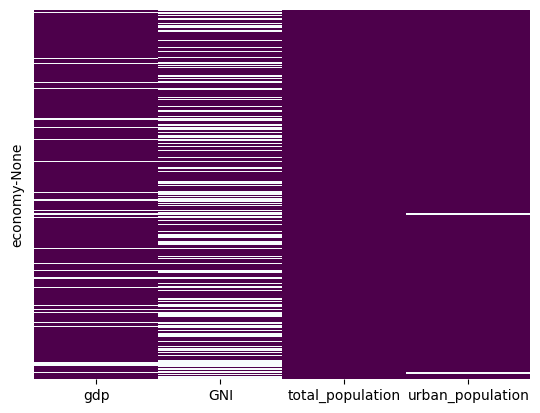

In [8]:
sns.heatmap(derived_df.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r');

In [41]:
percent_missing = derived_df.isnull().sum() * 100 / len(derived_df)

missing_value_df = pd.DataFrame({'column_name': derived_df.columns,'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df

,column_name,percent_missing
GNI,GNI,36.724806
gdp,gdp,7.248062
urban_population,urban_population,0.465116
total_population,total_population,0.000000


### We restrict the dataset to the countries to be used in the analysis

In [52]:
path = '/Users/ramzi.chariag/Documents/CEU/PhD/gnn_chapter-main/'
nodes = pd.read_csv(path + r'Input_datasets/cepii_node.csv')
nodes

,iso2,iso3,cnum,country,pays,area,dis_int,landlocked,continent,city_en,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,AD,AND,20,Andorra,Andorre,453,8.005398,0.0,Europe,Andorra la Vella,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,ARE,784,United Arab Emirates,Emirats arabes unis,83657,108.788994,0.0,Asia,Abu Dhabi,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,AFG,4,Afghanistan,Afghanistan,652225,303.761350,1.0,Asia,Kabul,...,Uzbek,NaN,NaN,NaN,NaN,NaN,NaN,GBR,NaN,NaN
3,AG,ATG,28,Antigua and Barbuda,Antigua-et-Barbuda,442,7.907605,0.0,America,Saint John's,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
4,AI,AIA,660,Anguilla,Anguilla,102,3.798690,0.0,America,The Valley,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0.0,Africa,Cape Town,...,Shoto,NaN,NaN,GBR,NLD,NaN,NaN,NaN,NaN,NaN
234,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0.0,Africa,Pretoria,...,Shoto,NaN,NaN,GBR,NLD,NaN,NaN,NaN,NaN,NaN
235,ZM,ZMB,894,Zambia,Zambie,752614,326.302150,1.0,Africa,Lusaka,...,Tonga,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
236,ZR,ZAR,180,Congo (Democratic Republic of the),"Congo, Rép. dém. du",2345410,576.027470,0.0,Africa,Kinshasa,...,Luba-Kasai,French,NaN,BEL,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
countries_restricted = pd.read_csv(path + r'Input_datasets/country_names_with_annual_trade_data.csv',usecols =['ISO_3166-1_numeric_code', 'Country_name'])
countries_restricted

,ISO_3166-1_numeric_code,Country_name
0,32,Argentina
1,36,Australia
2,40,Austria
3,68,Bolivia (Plurinational State of)
4,76,Brazil
...,...,...
81,834,United Rep. of Tanzania
82,842,USA
83,854,Burkina Faso
84,858,Uruguay


In [59]:
countries_restricted_merged = pd.merge(countries_restricted,nodes, how='left', left_on='ISO_3166-1_numeric_code', right_on='cnum')
countries_restricted_merged

,ISO_3166-1_numeric_code,Country_name,iso2,iso3,cnum,country,pays,area,dis_int,landlocked,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,32,Argentina,AR,ARG,32.0,Argentina,Argentine,2766889.0,625.64746,0.0,...,NaN,NaN,NaN,ESP,NaN,NaN,NaN,NaN,NaN,NaN
1,36,Australia,AU,AUS,36.0,Australia,Australie,7686848.0,1042.81670,0.0,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
2,36,Australia,AU,AUS,36.0,Australia,Australie,7686848.0,1042.81670,0.0,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
3,40,Austria,AT,AUT,40.0,Austria,Autriche,83858.0,108.91960,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEU,NaN,NaN
4,68,Bolivia (Plurinational State of),BO,BOL,68.0,Bolivia,Bolivie,1098581.0,394.23016,1.0,...,NaN,NaN,NaN,ESP,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,842,USA,US,USA,842.0,United States of America,Etats-Unis d'Amérique,9529106.0,1161.07400,0.0,...,NaN,NaN,NaN,GBR,FRA,ESP,NaN,NaN,NaN,NaN
92,842,USA,US,USA,842.0,United States of America,Etats-Unis d'Amérique,9529106.0,1161.07400,0.0,...,NaN,NaN,NaN,GBR,FRA,ESP,NaN,NaN,NaN,NaN
93,854,Burkina Faso,BF,BFA,854.0,Burkina Faso,Burkina Faso,274200.0,196.95523,1.0,...,NaN,NaN,NaN,FRA,NaN,NaN,NaN,NaN,NaN,NaN
94,858,Uruguay,UY,URY,858.0,Uruguay,Uruguay,176215.0,157.89023,0.0,...,NaN,NaN,NaN,ESP,NaN,NaN,NaN,BRA,NaN,NaN


In [62]:
countries = np.unique(countries_restricted_merged['iso3'].tolist())

In [63]:
len(countries)

86

In [69]:
restricted_raw = wb.data.DataFrame(['NY.GDP.MKTP.KD', 'SP.POP.TOTL','SP.URB.TOTL.IN.ZS'], countries, range (1995,2019))

YR1995        YR1996        YR1997  \
economy series                                                        
ARG     NY.GDP.MKTP.KD     3.483894e+11  3.676438e+11  3.974635e+11   
        SP.POP.TOTL        3.494611e+07  3.538936e+07  3.581597e+07   
        SP.URB.TOTL.IN.ZS  8.816400e+01  8.836600e+01  8.856400e+01   
AUS     NY.GDP.MKTP.KD     7.093247e+11  7.366822e+11  7.655074e+11   
        SP.POP.TOTL        1.800488e+07  1.822477e+07  1.842304e+07   
...                                 ...           ...           ...   
VCT     SP.POP.TOTL        1.141740e+05  1.142900e+05  1.142760e+05   
        SP.URB.TOTL.IN.ZS  4.338000e+01  4.374100e+01  4.410000e+01   
ZMB     NY.GDP.MKTP.KD     6.747775e+09  7.167389e+09  7.440754e+09   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
ARG     NY.GDP.MKTP.KD     4.127666e+11  3.987925e+11  3.956461e+11   
        SP.POP.TOTL        3.623320e+07  3.665303e+07  3.707077e+07   
        SP.URB.TOTL.IN.ZS  8.875900e+01  8.895200e+01  8.914200e+01   
AUS     NY.GDP.MKTP.KD     8.008230e+11  8.405144e+11  8.733043e+11   
        SP.POP.TOTL        1.860758e+07  1.881226e+07  1.902880e+07   
...                                 ...           ...           ...   
VCT     SP.POP.TOTL        1.141650e+05  1.139950e+05  1.138130e+05   
        SP.URB.TOTL.IN.ZS  4.446100e+01  4.482300e+01  4.518600e+01   
ZMB     NY.GDP.MKTP.KD     7.412051e+09  7.756726e+09  8.059030e+09   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
ARG     NY.GDP.MKTP.KD     3.782027e+11  3.369994e+11  3.667802e+11   
        SP.POP.TOTL        3.748049e+07  3.788503e+07  3.827816e+07   
        SP.URB.TOTL.IN.ZS  8.932900e+01  8.951000e+01  8.968600e+01   
AUS     NY.GDP.MKTP.KD     8.911320e+11  9.267202e+11  9.555542e+11   
        SP.POP.TOTL        1.927470e+07  1.949521e+07  1.972074e+07   
...                                 ...           ...           ...   
VCT     SP.POP.TOTL        1.136410e+05  1.134500e+05  1.131080e+05   
        SP.URB.TOTL.IN.ZS  4.554800e+01  4.591400e+01  4.628300e+01   
ZMB     NY.GDP.MKTP.KD     8.487518e+09  8.869967e+09  9.485984e+09   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004  ...        YR2009        YR2010  \
economy series                           ...                               
ARG     NY.GDP.MKTP.KD     3.998989e+11  ...  5.019171e+11  5.527382e+11   
        SP.POP.TOTL        3.866880e+07  ...  4.068434e+07  4.078845e+07   
        SP.URB.TOTL.IN.ZS  8.986000e+01  ...  9.069100e+01  9.084900e+01   
AUS     NY.GDP.MKTP.KD     9.958464e+11  ...  1.155579e+12  1.181078e+12   
        SP.POP.TOTL        1.993272e+07  ...  2.169165e+07  2.203175e+07   
...                                 ...  ...           ...           ...   
VCT     SP.POP.TOTL        1.126080e+05  ...  1.098400e+05  1.093080e+05   
        SP.URB.TOTL.IN.ZS  4.665600e+01  ...  4.856900e+01  4.896100e+01   
ZMB     NY.GDP.MKTP.KD     1.015308e+10  ...  1.498403e+10  1.652712e+10   
        SP.POP.TOTL        1.118804e+07  ...  1.331809e+07  1.379209e+07   
        SP.URB.TOTL.IN.ZS  3.643000e+01  ...  3.886100e+01  3.935500e+01   

                                 YR2011        YR2012        YR2013  \
economy series                                                        
ARG     NY.GDP.MKTP.KD     5.859243e+11  5.799102e+11  5.938590e+11   
        SP.POP.TOTL        4.126149e+07  4.173327e+07  4.22

In [72]:
derived_df = restricted_raw.stack().unstack('series')
derived_df.columns = ["gdp", "total_population","urban_population"]
derived_df

gdp  total_population  urban_population
economy                                                         
ARG     YR1995  3.483894e+11        34946110.0            88.164
        YR1996  3.676438e+11        35389362.0            88.366
        YR1997  3.974635e+11        35815971.0            88.564
        YR1998  4.127666e+11        36233195.0            88.759
        YR1999  3.987925e+11        36653031.0            88.952
...                      ...               ...               ...
ZMB     YR2014  2.064821e+10        15737793.0            41.382
        YR2015  2.125122e+10        16248230.0            41.907
        YR2016  2.205381e+10        16767761.0            42.438
        YR2017  2.282665e+10        17298054.0            42.976
        YR2018  2.374759e+10        17835893.0            43.521

[2016 rows x 3 columns]

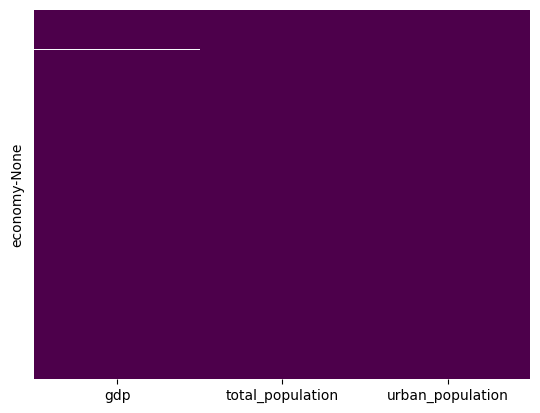

In [73]:
sns.heatmap(derived_df.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r');

#### Percentage of missing values for each variable:

In [74]:
percent_missing = derived_df.isnull().sum() * 100 / len(derived_df)

missing_value_df = pd.DataFrame({'column_name': derived_df.columns,'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df

,column_name,percent_missing
gdp,gdp,0.099206
total_population,total_population,0.000000
urban_population,urban_population,0.000000


In [75]:
derived_df.to_csv(path + r'Input_datasets/WBG_data.csv')